In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from numpy import mean
import scipy as sp
from scipy.stats import *

# import statistics
# from statistics import mean

sns.set_style("ticks")

%matplotlib inline


In [2]:
num_of_sample1 = 2
num_of_sample2 = 5
num_of_sample3 = 15
num_of_sample4 = 100
# number of sample
iters = 1000
# sample size
num_bins = int(1 + 3.322 * math.log(iters, 10))
# sturge's rule for num of bins

In [3]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 21
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
def plotting(x, y, c_means, fn_1,d):
    plt.figure(figsize=(30, 12))
    ax1=plt.subplot2grid((2,4), (0,1),colspan=2)
    if d==0:
#     ax1 = plt.subplot(2, 4, 3)
        sns.lineplot(x=x, y=y,color="black")
    # plot the line
        ax1.fill_between(x, y, color="orange", alpha=0.4)
    # fill the area underneath the line
    else:
        sns.barplot(x=x,y=y,color="orange")
    ax2=plt.subplot2grid((2,4), (1,0),colspan=1)
#     ax2 = plt.subplot(2, 4, 5)
    sns.histplot(data=c_means[0], color="black", bins=num_bins)
    ax3=plt.subplot2grid((2,4), (1,1),colspan=1)
#     ax3 = plt.subplot(2, 4, 6)
    sns.histplot(data=c_means[1], color="black", bins=num_bins)
    ax4=plt.subplot2grid((2,4), (1,2),colspan=1)
#     ax4 = plt.subplot(2, 4, 7)
    sns.histplot(data=c_means[2], color="black", bins=num_bins)
    ax5=plt.subplot2grid((2,4), (1,3),colspan=1)
#     ax5 = plt.subplot(2, 4, 8)
    sns.histplot(data=c_means[3], color="black", bins=num_bins)
    axes = [ax1, ax2, ax3, ax4, ax5]
    ax1.set(
        title=f"Probability Density/Mass Function",
        xlabel="x",
        ylabel="Probability Density/Mass",
    )
    ax2.set(
        title=f"n={num_of_sample1}",
        xlabel="x",
        ylabel="Frequency",
    )
    ax3.set(
        title=f"n={num_of_sample2}",
        xlabel="x",
        ylabel="Frequency",
    )
    ax4.set(
        title=f"n={num_of_sample3}",
        xlabel="x",
        ylabel="Frequency",
    )
    ax5.set(
        title=f"n={num_of_sample4}",
        xlabel="x",
        ylabel="Frequency",
    )
    plt.suptitle(f"         {fn_1} Distribution")

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.show()

### Uniform Distribution
#### Simulation of rowing a die of six sides with an expected outcome of 3.5

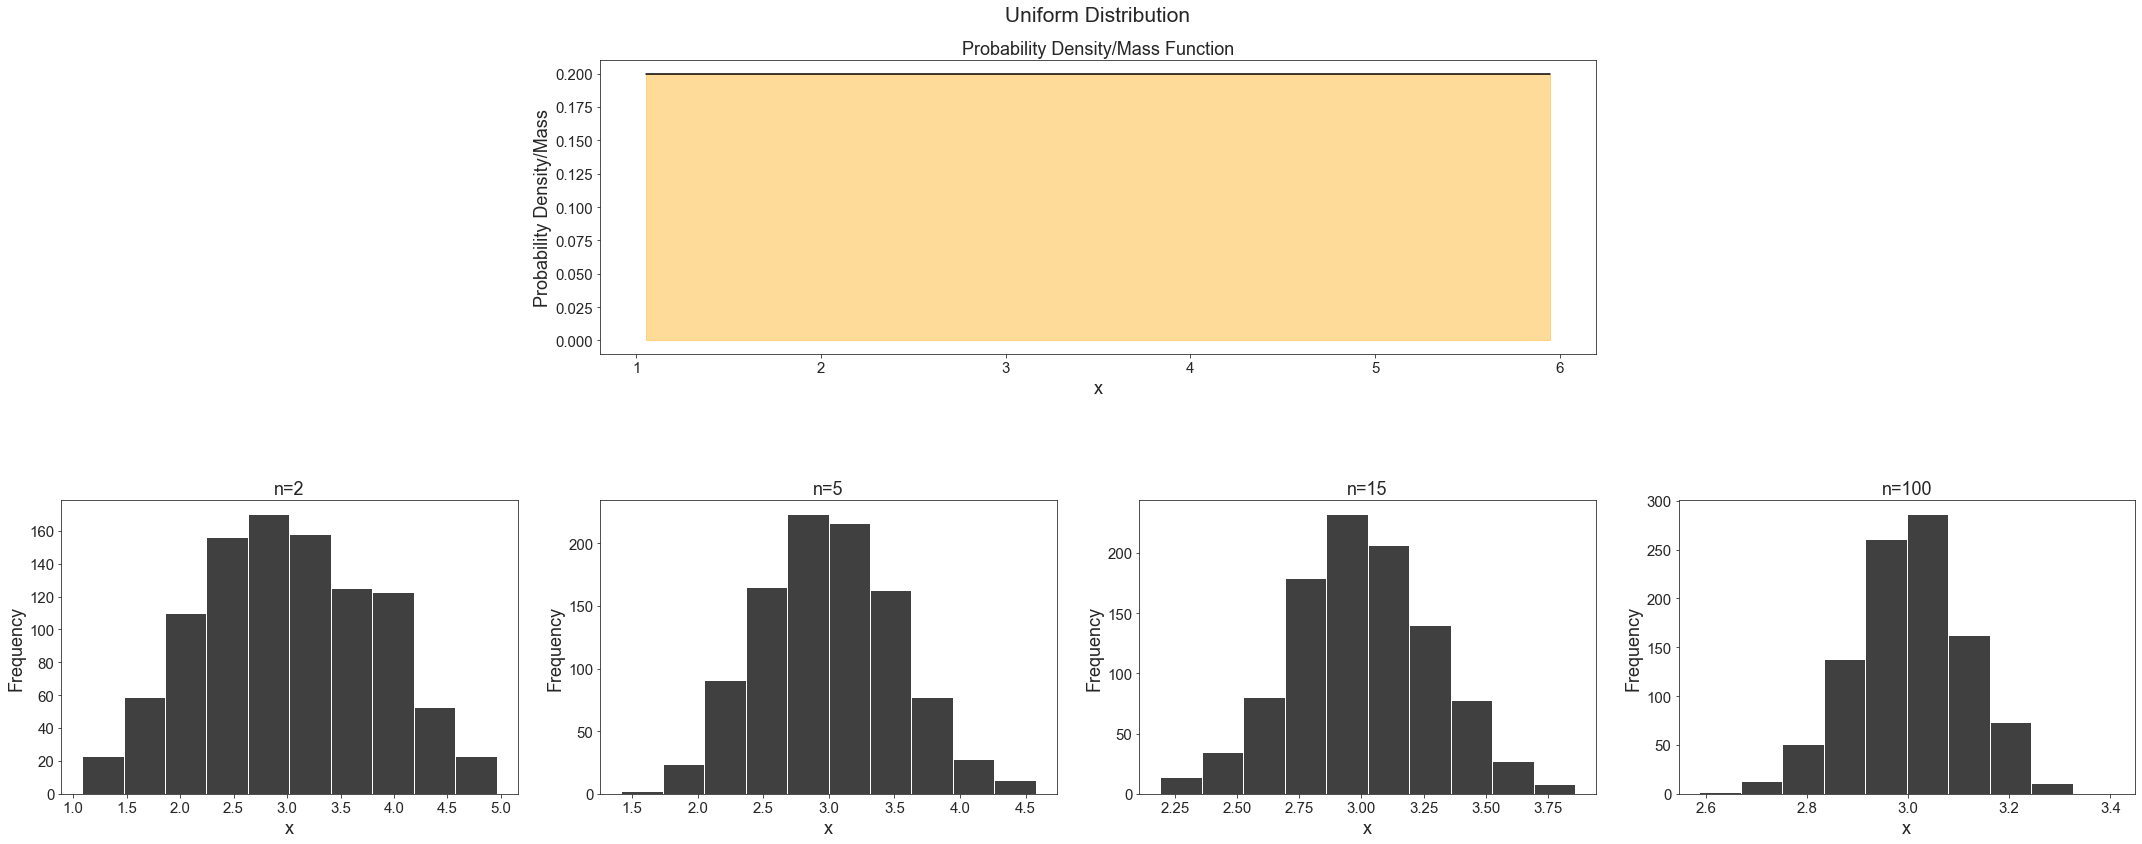

In [5]:
low = 1
# starting number (a)
high = 5
# end number (b)
x1 = np.array(
    [
        np.mean(
            np.random.default_rng().uniform(low=low, high=high, size=num_of_sample1)
        )
        for _i in range(iters)
    ]
)
# generate a uniform distribution with numbers from 1 to 6 and sample size of 2. Then we take the mean and iterate over 1000 times

x2 = np.array(
    [
        np.mean(
            np.random.default_rng().uniform(low=low, high=high, size=num_of_sample2)
        )
        for _i in range(iters)
    ]
)
# generate a uniform distribution with numbers from 1 to 6 and sample size of 5. Then we take the mean and iterate over 1000 times

x3 = np.array(
    [
        np.mean(
            np.random.default_rng().uniform(low=low, high=high, size=num_of_sample3)
        )
        for _i in range(iters)
    ]
)

x4 = np.array(
    [
        np.mean(
            np.random.default_rng().uniform(low=low, high=high, size=num_of_sample4)
        )
        for _i in range(iters)
    ]
)

means_1 = np.vstack((x1, x2, x3, x4))
# stacking arrays vertically to form a multi-dimensional array

x = np.linspace(uniform.ppf(0.01, low, high), uniform.ppf(0.99, low, high), 100)
# generate a series of x value using the distribution x axis
y = uniform.pdf(x, loc=low, scale=high)
# compute the pdf of the x value
plotting(x, y, means_1, "Uniform",d=0)
# call plotting function

## Poisson Distribution 
### mu =10

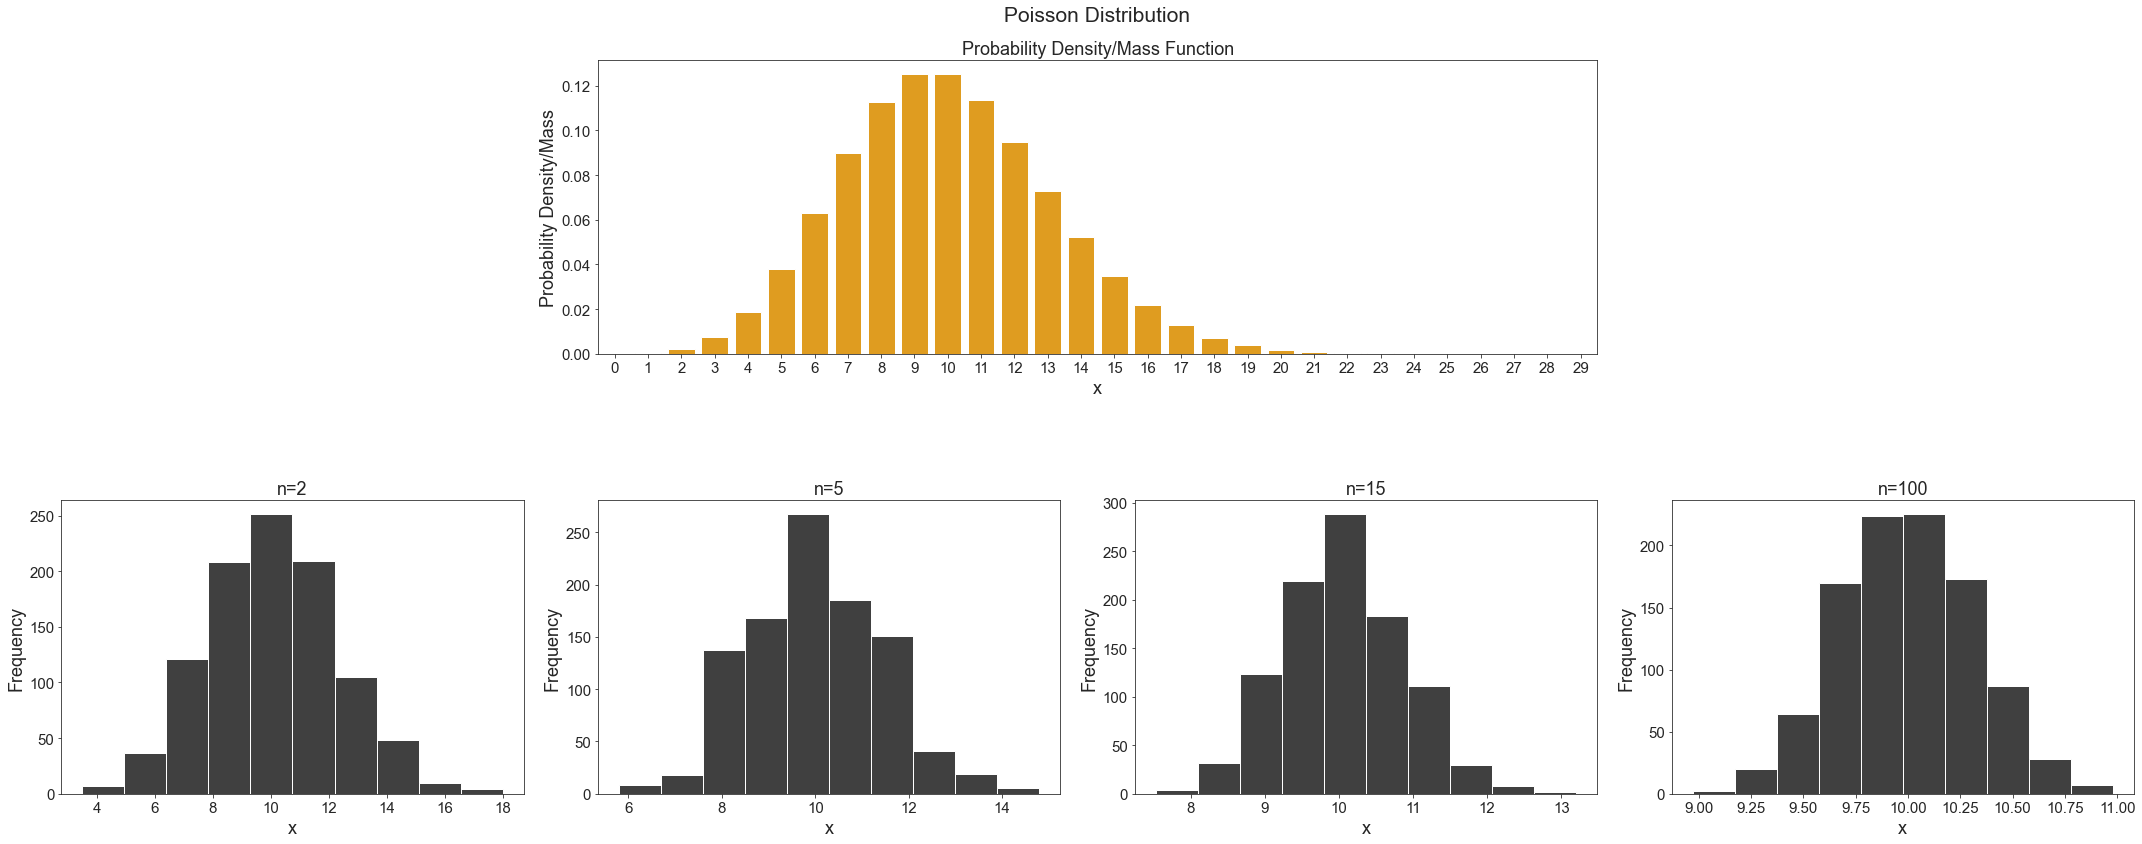

In [6]:
mu = 10
x1 = np.array(
    [np.mean(sp.stats.poisson.rvs(mu, size=num_of_sample1)) for _i in range(iters)]
)
# generate a poisson distribution with mean of 0, and size of 2. Take the mean and iterate over 1000 times

x2 = np.array(
    [np.mean(sp.stats.poisson.rvs(mu, size=num_of_sample2)) for _i in range(iters)]
)

x3 = np.array(
    [np.mean(sp.stats.poisson.rvs(mu, size=num_of_sample3)) for _i in range(iters)]
)

x4 = np.array(
    [np.mean(sp.stats.poisson.rvs(mu, size=num_of_sample4)) for _i in range(iters)]
)

means_1 = np.vstack((x1, x2, x3, x4))
# stacking arrays vertically to form a multi-dimensional array
n_poisson=30
# calculate the means for different sample size
x = np.arange(0, n_poisson, 1)
# generate a series of x value using the distribution for 30 number for x axis

# compute the pdf of the x value

y = [poisson.pmf(r, mu=mu, loc=0) for r in range(x.shape[0]) ]
plotting(x, y, means_1, "Poisson",d=1)
# call plotting function

## Binomial Distribution

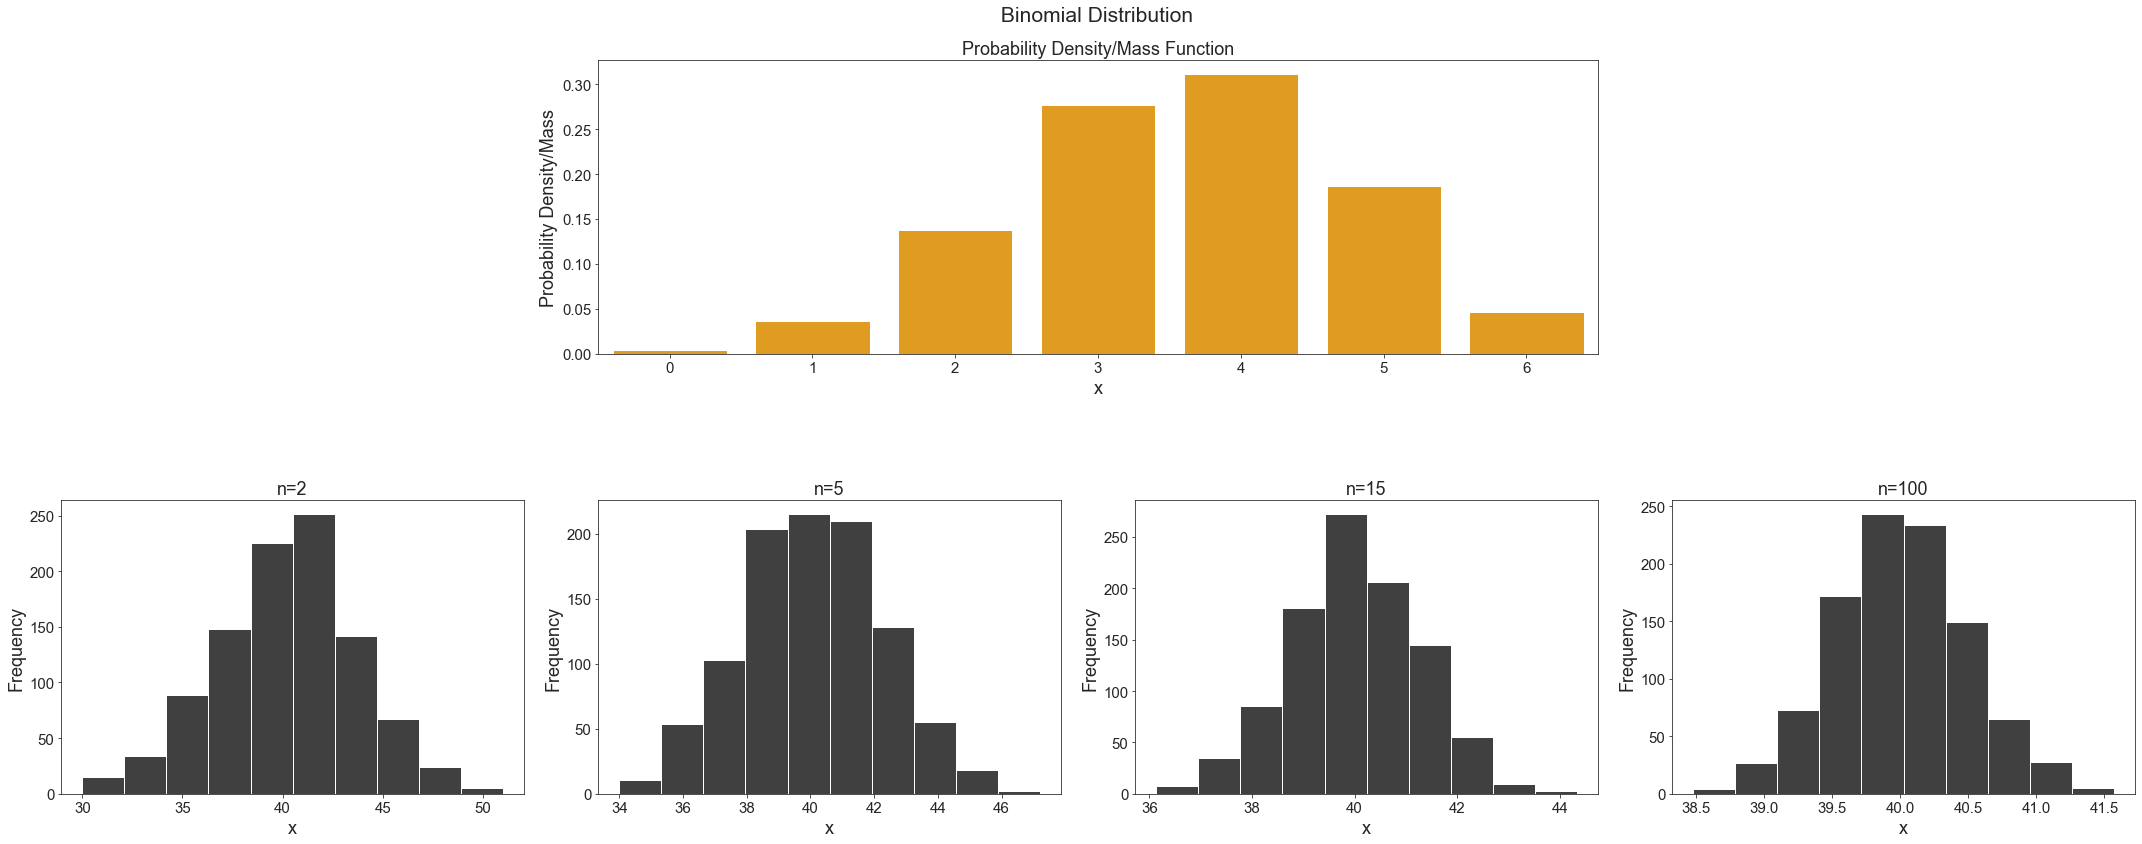

In [7]:
n = 100
p = 0.4

x1 = np.array(
    [
        np.mean(np.random.default_rng().binomial(n=n, p=p, size=num_of_sample1))
        for _i in range(iters)
    ]
)
# generate a binomial distribution with n = 100, p = 0.4. Then we take the mean of this series and iterate over 1000 times

x2 = np.array(
    [
        np.mean(np.random.default_rng().binomial(n=n, p=p, size=num_of_sample2))
        for _i in range(iters)
    ]
)

x3 = np.array(
    [
        np.mean(np.random.default_rng().binomial(n=n, p=p, size=num_of_sample3))
        for _i in range(iters)
    ]
)

x4 = np.array(
    [
        np.mean(np.random.default_rng().binomial(n=n, p=p, size=num_of_sample4))
        for _i in range(iters)
    ]
)

means_1 = np.vstack((x1, x2, x3, x4))
# stacking arrays vertically to form a multi-dimensional array
n_binom = 6    # number of trials for the pmf
p_binom = 0.6
# x = np.arange(binom.ppf(0.01,n_binom , p_binom), binom.ppf(0.99, n_binom, p_binom))
# generate a series of x value using the distribution x axis
x = list(range(n_binom + 1))
y = [binom.pmf(r, n_binom, p_binom) for r in x ]
# y = binom.pmf(x, n_binom, p_binom)


# r_values = list(range(n_binom + 1))
# # list of pmf values
# dist = [binom.pmf(r, n_binom, p_binom) for r in r_values ]
# # plotting the graph 
# plt.bar(r_values, dist)
# plt.show()


# compute the pdf of the x value
plotting(x, y, means_1, "Binomial",1)
# call plotting function

## Normal Distribution
### We calculate the mean of of a normal distribution with 4 different random sizes of 2, 5, 15, and 100.
### The simulation runs 1000 times

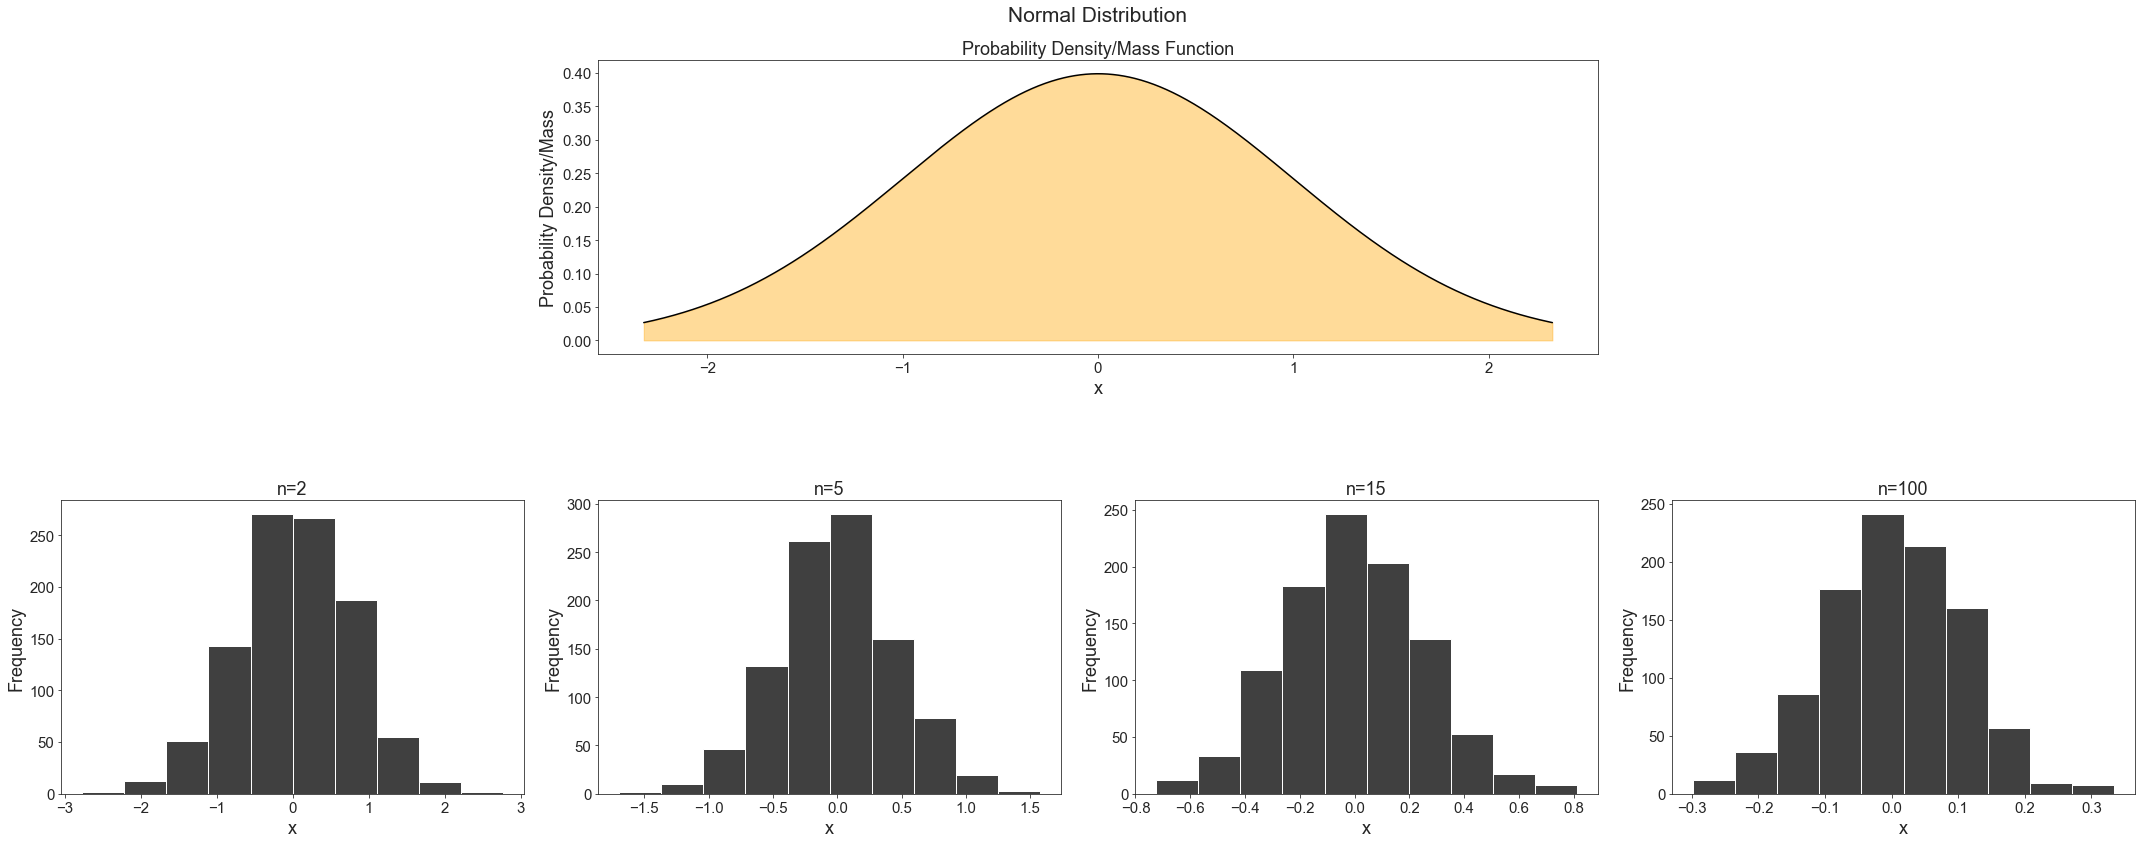

In [8]:
x1 = np.array(
    [
        np.mean(np.random.default_rng().normal(loc=0, scale=1, size=num_of_sample1))
        for _i in range(iters)
    ]
)
# generate a normal distribution with mean of 0, std of 1 and size of 2. Take the mean and iterate over 1000 times

x2 = np.array(
    [
        np.mean(np.random.default_rng().normal(loc=0, scale=1, size=num_of_sample2))
        for _i in range(iters)
    ]
)

x3 = np.array(
    [
        np.mean(np.random.default_rng().normal(loc=0, scale=1, size=num_of_sample3))
        for _i in range(iters)
    ]
)

x4 = np.array(
    [
        np.mean(np.random.default_rng().normal(loc=0, scale=1, size=num_of_sample4))
        for _i in range(iters)
    ]
)

means_1 = np.vstack((x1, x2, x3, x4))
# stacking arrays vertically to form a multi-dimensional array

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
# generate a series of x value using the distribution for 1000 number for a axis
y = norm.pdf(x)
# compute the pdf of the x value
plotting(x, y, means_1, "Normal",0)
# call plotting function

## Exponential Function

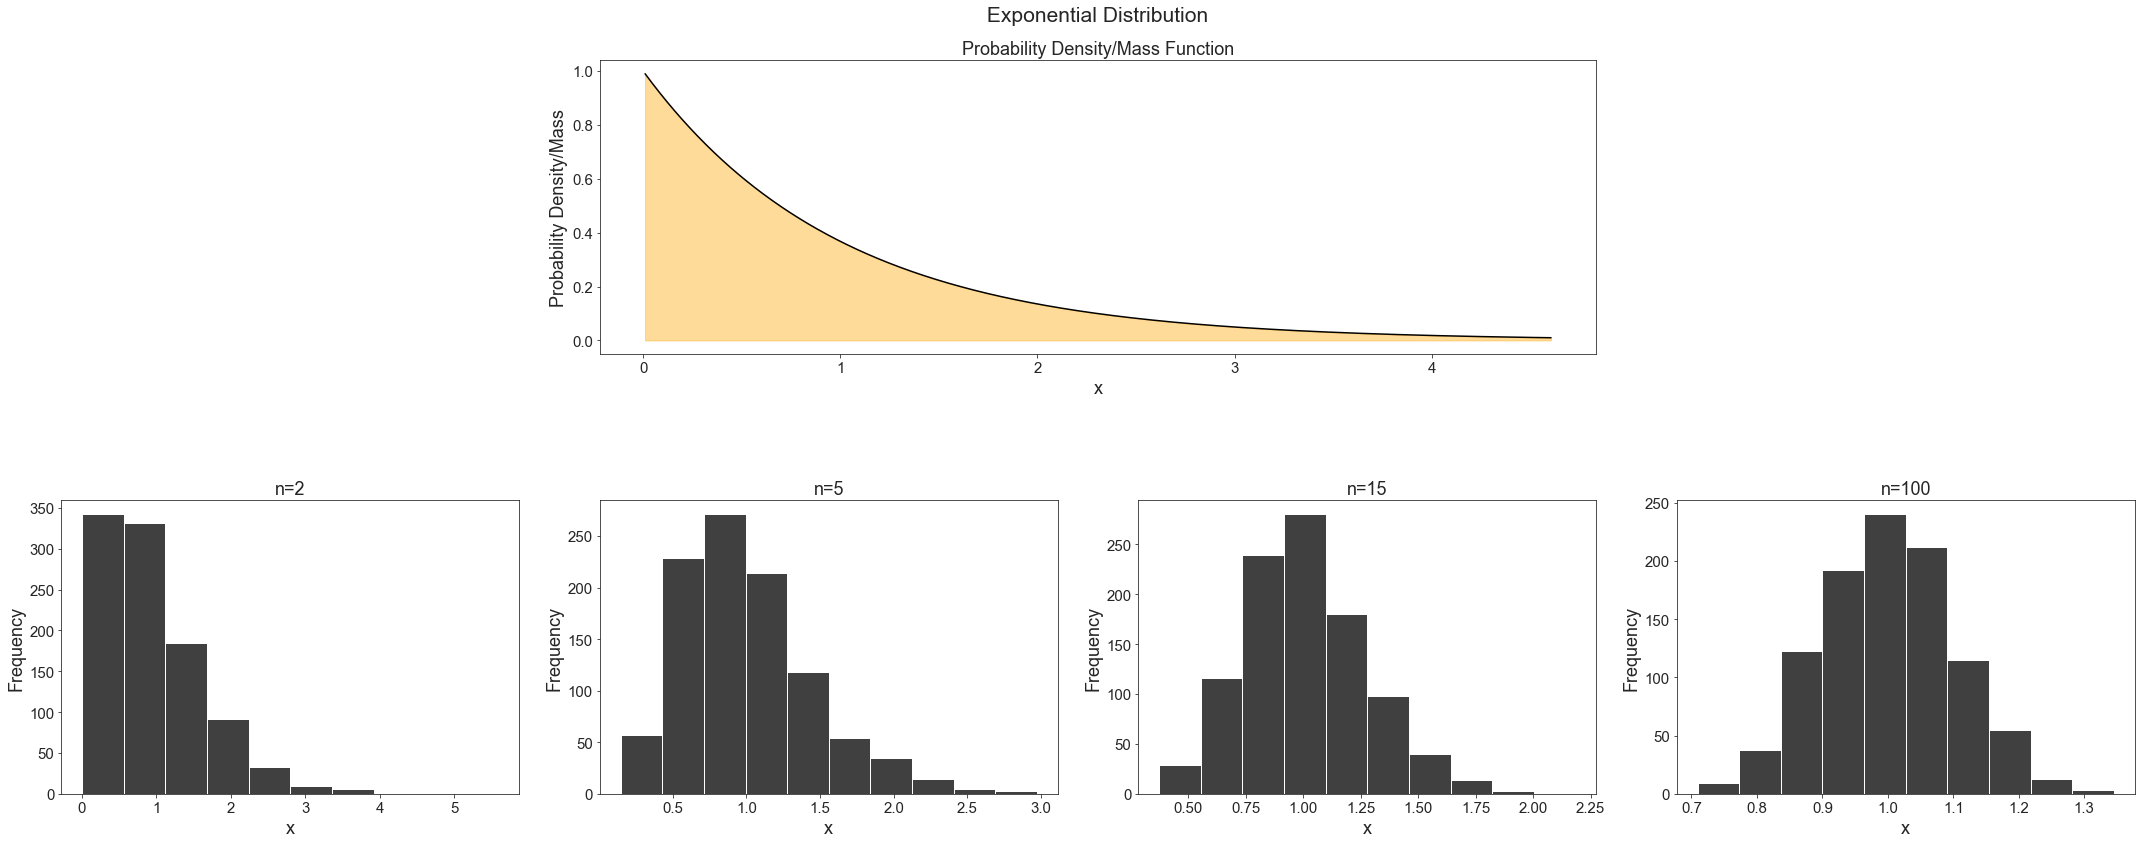

In [9]:
x1 = np.array(
    [
        np.mean(np.random.default_rng().exponential(scale=1.0, size=num_of_sample1))
        for _i in range(iters)
    ]
)
# generate a exponential distribution with mean of 0, std of 1 and size of 2. Take the mean and iterate over 1000 times

x2 = np.array(
    [
        np.mean(np.random.default_rng().exponential(scale=1.0, size=num_of_sample2))
        for _i in range(iters)
    ]
)

x3 = np.array(
    [
        np.mean(np.random.default_rng().exponential(scale=1.0, size=num_of_sample3))
        for _i in range(iters)
    ]
)

x4 = np.array(
    [
        np.mean(np.random.default_rng().exponential(scale=1.0, size=num_of_sample4))
        for _i in range(iters)
    ]
)

means_1 = np.vstack((x1, x2, x3, x4))
# stacking arrays vertically to form a multi-dimensional array

# calculate the means for different sample size
x = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 1000)
# generate a series of x value using the distribution for 1000 number for a axis
y = expon.pdf(x)
# compute the pdf of the x value
plotting(x, y, means_1, "Exponential",0)
# call plotting function